# Gradient Boosting Regression

The gradient boosting algorithm represents a forest of a fixed number of decision trees. These tress are called weak learners

First we need to load our data-set. [California Covid-19 Hospital data](https://data.ca.gov/dataset/covid-19-hospital-data1) directly from a California.gov data base.


In [6]:
import csv
import pandas as pd
import numpy as np
from sklearn.utils import Bunch
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('/home/third/Downloads/covid19hospitalbycounty.csv')

# Features

- hospitalized_covid_confirmed_patients
- hospitalized_suspected_covid_patients
- hospitalized_covid_patients
- all_hospital_beds
- icu_covid_confirmed_patients
- icu_suspected_covid_patients

# Target
- icu_available_beds

In [8]:
df.head(len(df))

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Merced,2020-03-29,1.0,7.0,NaN,NaN,0.0,0.0,3.0
1,Kern,2020-03-29,16.0,57.0,NaN,NaN,8.0,8.0,39.0
2,Fresno,2020-03-29,8.0,116.0,NaN,NaN,3.0,14.0,22.0
3,Yuba,2020-03-29,2.0,12.0,NaN,NaN,2.0,4.0,2.0
4,Trinity,2020-03-29,0.0,0.0,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
54592,Sonoma,2022-11-28,51.0,20.0,71.0,674.0,3.0,2.0,23.0
54593,San Bernardino,2022-11-28,166.0,3.0,169.0,3563.0,20.0,0.0,153.0
54594,Calaveras,2022-11-28,3.0,0.0,3.0,33.0,0.0,0.0,0.0
54595,Colusa,2022-11-28,0.0,0.0,0.0,30.0,0.0,0.0,0.0


Here is a sample of our data base. We will need to clean this data up. First we will start with replacing all the NaN values with 0's


In [9]:
df = df.fillna(0)

In [10]:
df.head(len(df))

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Merced,2020-03-29,1.0,7.0,0.0,0.0,0.0,0.0,3.0
1,Kern,2020-03-29,16.0,57.0,0.0,0.0,8.0,8.0,39.0
2,Fresno,2020-03-29,8.0,116.0,0.0,0.0,3.0,14.0,22.0
3,Yuba,2020-03-29,2.0,12.0,0.0,0.0,2.0,4.0,2.0
4,Trinity,2020-03-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
54592,Sonoma,2022-11-28,51.0,20.0,71.0,674.0,3.0,2.0,23.0
54593,San Bernardino,2022-11-28,166.0,3.0,169.0,3563.0,20.0,0.0,153.0
54594,Calaveras,2022-11-28,3.0,0.0,3.0,33.0,0.0,0.0,0.0
54595,Colusa,2022-11-28,0.0,0.0,0.0,30.0,0.0,0.0,0.0


# Counties Included in the Data

- Alameda
- Amador 
- Butte
- Calaveras
- Colusa 
- Contra Costa 
- Del Norte
- El Dorado
- Fresno
- Glenn
- Humboldt
- Imperial
- Inyo
- Kern
- Kings
- Lake
- Lassen
- Los Angeles
- Madera
- Marin
- Mariposa
- Mendocino
- Merced
- Modoc
- Mono
- Monterey
- Napa
- Nevada
- Orange
- Placer
- Plumas
- Riverside
- Sacramento
- San Benito
- San Bernardino
- San Diego
- San Francisco
- San Joaquin
- San Luis Obispo
- San Mateo
- Santa Barbara
- Santa Clara
- Santa Cruz
- Shasta
- Siskiyou
- Solano
- Sonoma
- Stanislaus
- Sutter
- Tehama
- Trinity
- Tulare
- Tuolumne
- Ventura
- Yolo
- Yuba'

In [11]:
df = df._get_numeric_data()
df.head()

,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,1.0,7.0,0.0,0.0,0.0,0.0,3.0
1,16.0,57.0,0.0,0.0,8.0,8.0,39.0
2,8.0,116.0,0.0,0.0,3.0,14.0,22.0
3,2.0,12.0,0.0,0.0,2.0,4.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now that we've cleaned up the data we will need to convert it into a numeric array that is suitable for scikit-learn.

In [12]:
# put the numeric column names in a python list
numeric_headers = list(df.columns.values)

# create a numpy array with the numeric values for input into scikit-learn
numpy_array = df.to_numpy()

In [13]:
n_samples = len(df) #number of data rows, don't count header
n_features = 6 #number of columns for features, don't count target column
feature_names = [numeric_headers[0],numeric_headers[1],numeric_headers[2],numeric_headers[4],numeric_headers[4],numeric_headers[5]] 
target_names = [numeric_headers[6]] 
data = np.empty((n_samples, n_features))
target = np.empty((n_samples), dtype=np.int)

for i, sample in enumerate(numpy_array):
    data[i] = np.asarray(sample[:-1], dtype=np.float64)
    target[i] = np.asarray(sample[-1], dtype=np.int)

In [14]:
data = Bunch(data=data, target=target, feature_names = feature_names, target_names = target_names)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

In [16]:
#training and test split
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, random_state=42, test_size=.1)

# Target Data

In [17]:
y = pd.Series(data.target)

Below we will be standardizing the features by removing the mean and scaling to the unit variance calculated as:
z = (x - u) / s

In [18]:
#standardize data set
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Target Predictions

# Hyperparameters

In [19]:
#Hyperparameters for GradientBoost
gbr_params = {'n_estimators': 10000,
                    'max_depth': 2,
                    'min_samples_split': 2,
                    'learning_rate': 0.01,
                    'loss': 'squared_error'}

In [20]:
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_std, Y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: {0:.2f}%".format(gbr.score(X_test_std, Y_test)* 100))
#
# Create the mean squared error
#
mse = mean_squared_error(Y_test, gbr.predict(X_test_std))

print("The mean squared error (MSE) on test set: {:.2f}".format(mse))

Model Accuracy: 97.78%
The mean squared error (MSE) on test set: 221.26


# Predictions
Here is an array of our predictions

In [21]:
gbr.predict(X_test_std)

array([ 0.60288064, 14.92058963,  2.96656128, ...,  1.09701528,
        2.86675143,  0.64347802])

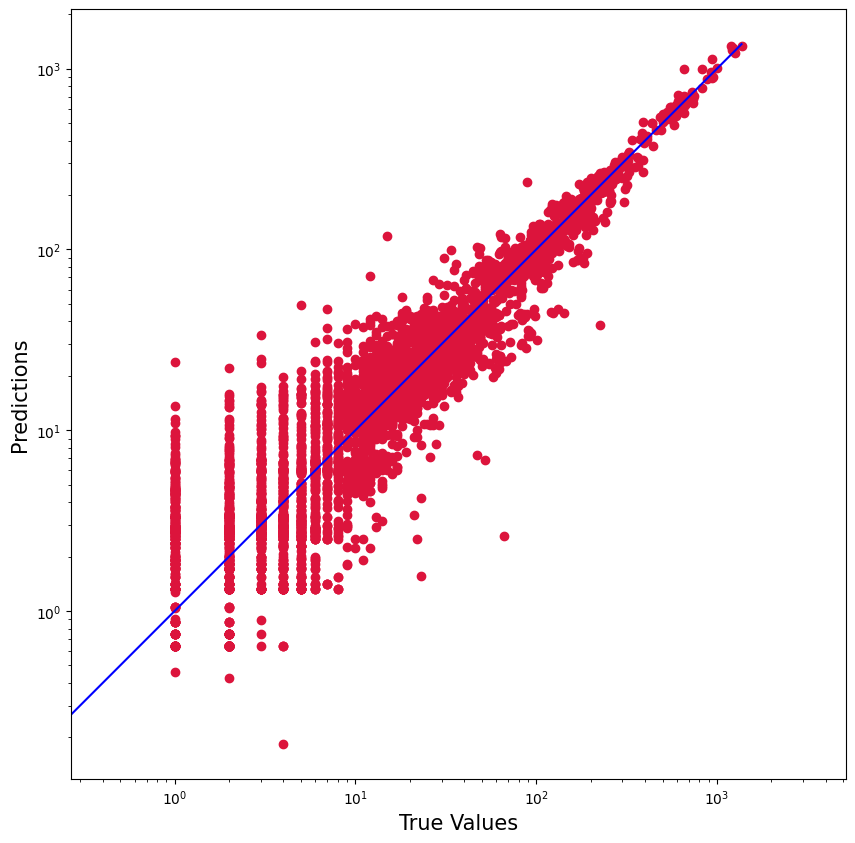

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, gbr.predict(X_test_std), c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(gbr.predict(X_test_std)), max(Y_test))
p2 = min(min(gbr.predict(X_test_std)), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Above is a a plot grah of our predictions compared to our test cases. Gradient boosting model is considered a weak learner. The more trees we build the more accurate the model as seen in the graph above.

# Hyperparameter Tuning

In [ ]:
LR = {'learning_rate':[0.15,0.099,0.5,.01], 'n_estimators':[169,200,500,1000], 'max_depth':[1,2,3,4]}
tuning = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = LR, scoring='r2')
tuning.fit(X_train,Y_train)
tuning.best_params_, tuning.best_score_

# Feature Importance

In [ ]:
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.feature_names)[sorted_idx])
plt.title('Feature Importance')
result = permutation_importance(gbr, X_test_std, Y_test, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

# Training and Test Deviance

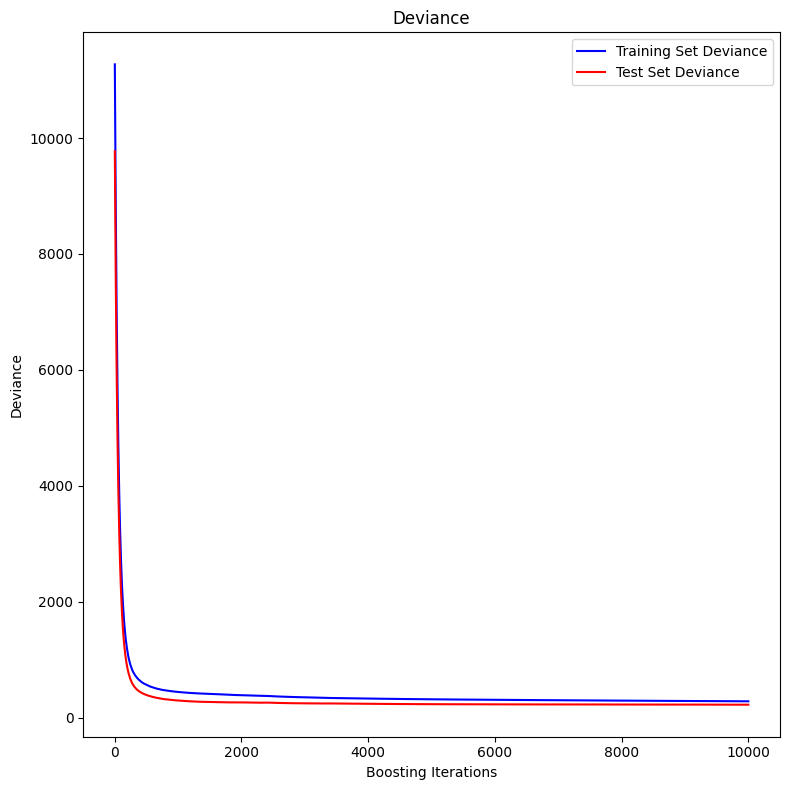

In [365]:
#Training and Test Deviance
test_score = np.zeros((gbr_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test_std)):
    test_score[i] = gbr.loss_(Y_test, y_pred)
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, gbr.train_score_, 'b-',label='Training Set Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, test_score, 'r-',label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# Interactive
Run the next block and type in one of the Counties listed below.


    Alameda
    Amador
    Butte
    Calaveras
    Colusa
    Contra Costa
    Del Norte
    El Dorado
    Fresno
    Glenn
    Humboldt
    Imperial
    Inyo
    Kern
    Kings
    Lake
    Lassen
    Los Angeles
    Madera
    Marin
    Mariposa
    Mendocino
    Merced
    Modoc
    Mono
    Monterey
    Napa
    Nevada
    Orange
    Placer
    Plumas
    Riverside
    Sacramento
    San Benito
    San Bernardino
    San Diego
    San Francisco
    San Joaquin
    San Luis Obispo
    San Mateo
    Santa Barbara
    Santa Clara
    Santa Cruz
    Shasta
    Siskiyou
    Solano
    Sonoma
    Stanislaus
    Sutter
    Tehama
    Trinity
    Tulare
    Tuolumne
    Ventura
    Yolo
    Yuba



# County Specific Model with Tuning Capabilities at the bottom

Enter a valid county from the list above.

In [384]:
county = input("Enter a county from above: ")

Enter a county from above: Orange


Load and clean the data.

In [385]:
df2 = pd.read_csv('/home/third/Downloads/covid19hospitalbycounty.csv')

In [386]:
df2 = df2.fillna(0)

Creates a list of counties.

In [387]:
unique_counties = []
ul = df2['county'].to_list()
for i in ul:
    if i not in unique_counties:
        unique_counties.append(i)

Validate input.

In [388]:
if county in unique_counties:
    df2 = df2[df2.county == county]
else:
    print('Please enter a valid county. Case Sensitive')

In [389]:
df2.head()
df2 = df2._get_numeric_data()

In [390]:
# put the numeric column names in a python list
numeric_headers2 = list(df2.columns.values)

# create a numpy array with the numeric values for input into scikit-learn
numpy_array2 = df2.to_numpy()

n_samples2 = len(df) #number of data rows, don't count header
n_features2 = 6 #number of columns for features, don't count target column
feature_names2 = [numeric_headers[0],numeric_headers[1],numeric_headers[2],numeric_headers[4],numeric_headers[4],numeric_headers[5]] 
target_names2 = [numeric_headers[6]] 
data2 = np.empty((n_samples, n_features))
target2 = np.empty((n_samples), dtype=np.int)

for i, sample in enumerate(numpy_array2):
    data2[i] = np.asarray(sample[:-1], dtype=np.float64)
    target2[i] = np.asarray(sample[-1], dtype=np.int)
data2 = Bunch(data2=data2, target2=target2, feature_names2 = feature_names2, target_names2 = target_names2)

#training and test split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(data2.data2, data2.target2, random_state=42, test_size=.1)

#standardize data set
sc2 = StandardScaler()
X_train_std2 = sc2.fit_transform(X_train2)
X_test_std2 = sc2.transform(X_test2)

#Hyperparameters for GradientBoost
gbr_params2 = {'n_estimators': 100,
                    'max_depth': 2,
                    'min_samples_split': 2,
                    'learning_rate': 0.099,
                    'loss': 'squared_error'}

# Create an instance of gradient boosting regressor
gbr2 = GradientBoostingRegressor(**gbr_params2)

# Fit the model
gbr2.fit(X_train_std2, Y_train2)

# Print Coefficient of determination R^2

print("Model Accuracy: {0:.2f}%".format(gbr2.score(X_test_std2, Y_test2)* 100))

# Create the mean squared error
mse2 = mean_squared_error(Y_test2, gbr2.predict(X_test_std2))


print("The mean squared error (MSE) on test set: {:.2f}".format(mse2))

Model Accuracy: 34.50%
The mean squared error (MSE) on test set: 161174883.84


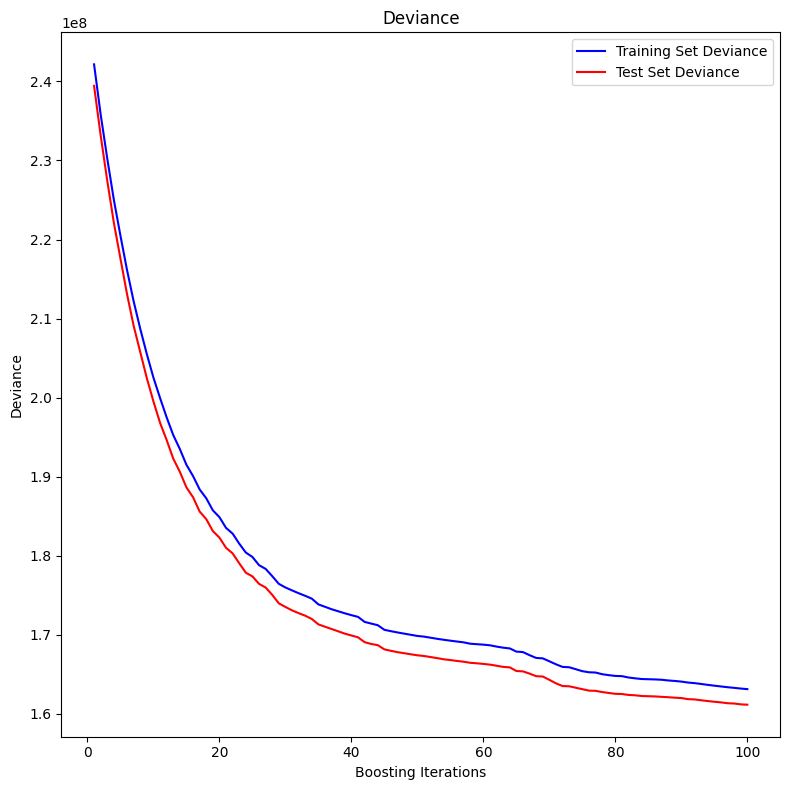

In [394]:
#Training and Test Deviance
test_score = np.zeros((gbr_params2['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr2.staged_predict(X_test_std2)):
    test_score[i] = gbr2.loss_(Y_test2, y_pred)
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params2['n_estimators']) + 1, gbr2.train_score_, 'b-',label='Training Set Deviance')
plt.plot(np.arange(gbr_params2['n_estimators']) + 1, test_score, 'r-',label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# Hyperparameter Testing

In [362]:
LR = {'learning_rate':[0.099,0.5,.01], 'n_estimators':[10,20,40,80], 'max_depth':[1,2,3,4]}
tuning = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = LR, scoring='r2')
tuning.fit(X_train2,Y_train2)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.099, 'max_depth': 1, 'n_estimators': 20},
 0.0020610479395428037)